In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# initialization

In [2]:
BATCH_SIZE=1
time_step=30 #data of prevoius 29 hours + current data
n_features = 7 #day month year weekday hour temperature previous_hour_load

# load data

In [3]:
# to know more about x_test and y_test you can check load_predict_step_by_step.ipynb code
import pickle
pic_in=open("./data/x_test.pickle","rb")
x_test=pickle.load(pic_in)

pic_in=open("./data/y_test.pickle","rb")
y_test=pickle.load(pic_in)

print(x_test.shape)
print(y_test.shape)

(7263, 30, 7)
(7263, 1)


# load model

In [4]:
from keras.models import model_from_json
json_file = open('./data/LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

Using TensorFlow backend.


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 30, 64)               18432     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (1, 30, 64)               0         
_________________________________________________________________
dropout_1 (Dropout)          (1, 30, 64)               0         
_________________________________________________________________
batch_normalization_1 (Batch (1, 30, 64)               256       
_________________________________________________________________
lstm_2 (LSTM)                (1, 30, 128)              98816     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (1, 30, 128)              0         
_________________________________________________________________
dropout_2 (Dropout)          (1, 30, 128)             

# loading pre-trained weight

In [6]:
model.load_weights('./data/weight.h5')

# testing

In [7]:
batch_size=BATCH_SIZE
#predict on test dataset
y_pred=model.predict(x_test, batch_size=batch_size)
model.reset_states()

In [8]:
x_axis=np.linspace(1,len(y_pred),len(y_pred))
print(x_axis.shape)
y_pred=y_pred.reshape(-1)
y_test=y_test.reshape(-1)
#inverse scaling, here ymax=27622 and ymin=7794
y_test=y_test*(27622-7794)+7794
y_pred=y_pred*(27622-7794)+7794
print(y_pred.shape)
print(y_test.shape)

(7263,)
(7263,)
(7263,)


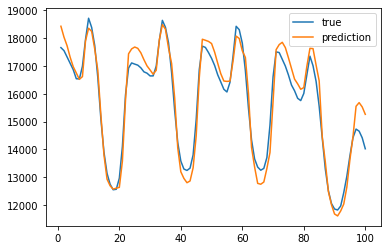

In [9]:
plt.plot(x_axis[:100],y_test[:100])
plt.plot(x_axis[:100],y_pred[:100])
plt.legend(['true','prediction'])
plt.show()

In [10]:
print(y_pred[5])
print(y_test[5])

16749.05
16542.0
